In [1]:
 #load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)

2048

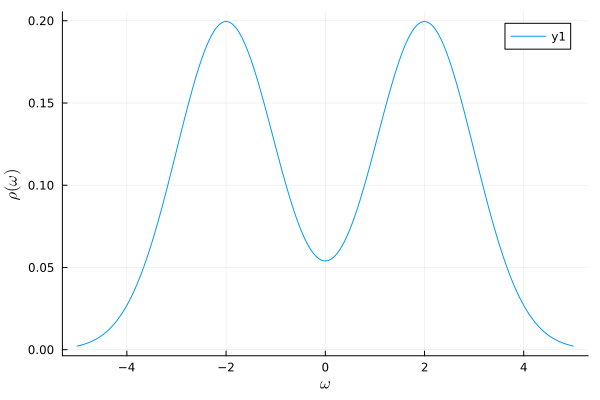

In [3]:
 #define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
moments = Complex{T}.([1, 0, 5, 0, 43])

5-element Vector{Complex{BigFloat}}:
  1.0 + 0.0im
  0.0 + 0.0im
  5.0 + 0.0im
  0.0 + 0.0im
 43.0 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper


In [9]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
H=1
Iter     Function value   Gradient norm 
     0     5.822660e-01     1.734370e+00
 * time: 0.014084100723266602
     1     3.896799e-01     9.749887e-01
 * time: 1.89621901512146
     2     3.481959e-01     7.155324e-01
 * time: 2.590708017349243
     3     2.574300e-01     1.715028e-01
 * time: 3.6350162029266357
     4     2.519761e-01     4.216214e-02
 * time: 4.6452720165252686
     5     2.518439e-01     7.430777e-04
 * time: 5.631570100784302
     6     2.518438e-01     1.555046e-04
 * time: 6.317461013793945
     7     2.518438e-01     3.589196e-05
 * time: 6.944655179977417
     8     2.518438e-01     2.165771e-05
 * time: 7.945395231246948
     9     2.518438e-01     3.279631e-06
 * time: 9.100884199142456
    10     2.518438e-01     1.250200e-06
 * time: 9.984654188156128
    11     2.518438e-01     2.992597e-07
 * time: 11.250725030899048
    12     2.518438e-01     7.97144

In [10]:
Nevanlinna.solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     2.518438e-01     5.216471e-09
 * time: 0.00017690658569335938
max_theta=0.208372380510642912923352310523375502500183911239657542554088857761913884278842186123601999808241157623552101191844506729840881317703749521469422976931205987594948463035657554538982643475360119933862544702119206785147588800174886107759206756074830648517577617415574086251366596686469343771592904178394408673181351280562544961414821342660447409403316727141645662685824829585795352885935912940554490322649051467855236083315368864698787548782698143589861290854951495255521870277298123706981395207279504504683472030274602099817881780802870865424692721268208316965900774289514583748342754032637661480978052016945902098140319
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     2.518438e-01     1.159283e+00
 * time: 0.0002009868621826172
     1     1.672955e-01     6.039425e-01
 * time: 0.9873361587524414
     2     8.946214e-02     2.413

max_theta=0.404436869076131279211104054017226137739741188492645801297087024880242374962057468937073172067938218073304448003239893169609887705499201987941668059352015882518856479987050069412001510992909983909476073072543271679565474981059978184028425950494503156857793895071224454108149697724894596592631534119034412342468538307477864788865264254915474791591184221912357899722235776692658368213403502269425285442129081938317506086923209149737736001969704437730780815683377410409100728126020163516943203734248200219210778890307889392729809952164675040203246546038089142675099753048597675979844987244284255025496422146199711262040609
hardy optimization was success.
H=6
Iter     Function value   Gradient norm 
     0     2.576100e-03     4.996468e-02
 * time: 0.0001819133758544922
     1     2.333975e-03     4.447173e-02
 * time: 0.8090598583221436
     2     2.162743e-03     2.526355e-02
 * time: 1.605785846710205
     3     1.986437e-03     2.630550e-02
 * time: 2.4301609992980957
     4     1.8

    29     1.260658e-04     2.967822e-06
 * time: 39.41478085517883
    30     1.260658e-04     1.313770e-06
 * time: 40.41535997390747
    31     1.260658e-04     5.967920e-07
 * time: 41.36626100540161
    32     1.260658e-04     2.225987e-07
 * time: 42.28970789909363
    33     1.260658e-04     9.296317e-08
 * time: 43.281558990478516
    34     1.260658e-04     4.334882e-08
 * time: 44.331764936447144
    35     1.260658e-04     1.611219e-08
 * time: 46.064231872558594
    36     1.260658e-04     6.303985e-09
 * time: 47.203067779541016
max_theta=0.45917349851790701688951534222528538372473170468188007965739705186295786904447783086575838358681358276123965778414603182942185994134516265647338839066602906166932625276793008056971880081078129298147704962104001063091901697837104904588231316893137454798763862924423098066639742284110901924268795311515543373529609835930604925824710008644633744454455515286155206181079898005867102940387305934055485424520391555806052936868816292856953695866199

    43     2.894527e-05     9.278942e-04
 * time: 72.9942319393158
    44     2.888945e-05     1.154582e-03
 * time: 75.18228602409363
    45     2.880673e-05     1.323750e-03
 * time: 77.45472288131714
    46     2.866042e-05     1.330677e-03
 * time: 79.66809701919556
    47     2.843064e-05     7.317498e-04
 * time: 81.71283006668091
    48     2.831845e-05     3.948548e-04
 * time: 83.60490202903748
    49     2.830668e-05     6.900669e-05
 * time: 84.9425299167633
    50     2.830591e-05     3.429392e-05
 * time: 86.9964828491211
    51     2.830579e-05     1.803547e-05
 * time: 88.26595401763916
    52     2.830575e-05     6.869208e-06
 * time: 89.53856706619263
    53     2.830575e-05     3.206353e-06
 * time: 90.76831293106079
    54     2.830574e-05     1.752248e-06
 * time: 92.71020197868347
    55     2.830574e-05     7.832903e-07
 * time: 93.90640997886658
    56     2.830574e-05     3.451820e-07
 * time: 95.82911491394043
    57     2.830574e-05     1.496624e-07
 * time: 9

    14     1.700027e-05     2.568755e-04
 * time: 23.179550886154175
    15     1.684959e-05     2.723545e-04
 * time: 25.104732036590576
    16     1.675252e-05     1.900946e-04
 * time: 27.076820850372314
    17     1.664858e-05     3.075661e-04
 * time: 29.958680868148804
    18     1.662674e-05     1.846597e-04
 * time: 31.18631100654602
    19     1.661820e-05     1.904366e-04
 * time: 33.0319390296936
    20     1.660768e-05     1.775525e-04
 * time: 35.148792028427124
    21     1.659920e-05     2.213890e-04
 * time: 37.621346950531006
    22     1.659112e-05     1.779373e-04
 * time: 40.05809783935547
    23     1.657973e-05     2.111237e-04
 * time: 41.924996852874756
    24     1.656100e-05     1.926518e-04
 * time: 43.87443995475769
    25     1.652049e-05     3.338453e-04
 * time: 45.706778049468994
    26     1.650485e-05     3.680757e-04
 * time: 47.05695581436157
    27     1.642744e-05     6.676337e-04
 * time: 49.25624895095825
    28     1.631862e-05     1.066224e-03


    30     1.357095e-05     4.979031e-04
 * time: 53.34903883934021
    31     1.351536e-05     5.611833e-04
 * time: 55.36590600013733
    32     1.347512e-05     5.905154e-04
 * time: 56.732733964920044
    33     1.340851e-05     4.622057e-04
 * time: 58.831135988235474
    34     1.336701e-05     2.486590e-04
 * time: 60.86532688140869
    35     1.335092e-05     2.183150e-04
 * time: 62.96497201919556
    36     1.334683e-05     4.091023e-05
 * time: 64.3227698802948
    37     1.334433e-05     4.602728e-05
 * time: 66.3902599811554
    38     1.334258e-05     8.740750e-05
 * time: 68.59963083267212
    39     1.333921e-05     1.057952e-04
 * time: 70.61945080757141
    40     1.332275e-05     3.117449e-04
 * time: 73.38479399681091
    41     1.327232e-05     7.100673e-04
 * time: 75.4364709854126
    42     1.320022e-05     6.853564e-04
 * time: 77.53548789024353
    43     1.313616e-05     8.193555e-04
 * time: 79.54549980163574
    44     1.306291e-05     8.222393e-04
 * time:

    34     1.253699e-05     2.597546e-05
 * time: 60.58342099189758
    35     1.253682e-05     2.912920e-05
 * time: 62.570159912109375
    36     1.253646e-05     4.508832e-05
 * time: 65.49282479286194
    37     1.253579e-05     7.041439e-05
 * time: 67.59230279922485
    38     1.253411e-05     1.024253e-04
 * time: 69.57461595535278
    39     1.253146e-05     1.441531e-04
 * time: 71.54939794540405
    40     1.252590e-05     2.249029e-04
 * time: 73.45614981651306
    41     1.251869e-05     2.748220e-04
 * time: 75.38502478599548
    42     1.250911e-05     3.416870e-04
 * time: 77.30460786819458
    43     1.250105e-05     3.733083e-04
 * time: 79.25501680374146
    44     1.249283e-05     4.042835e-04
 * time: 81.22243690490723
    45     1.248060e-05     3.942978e-04
 * time: 83.40311598777771
    46     1.244164e-05     2.481822e-04
 * time: 86.09132385253906
    47     1.243556e-05     8.369472e-05
 * time: 87.40908288955688
    48     1.242904e-05     4.778771e-05
 * tim

     4     1.217688e-05     1.191038e-04
 * time: 6.304047107696533
     5     1.217440e-05     1.124099e-04
 * time: 7.656435012817383
     6     1.217197e-05     1.124524e-04
 * time: 9.052000999450684
     7     1.216910e-05     1.366796e-04
 * time: 10.377182006835938
     8     1.216546e-05     1.131181e-04
 * time: 11.731245040893555
     9     1.216171e-05     1.389019e-04
 * time: 13.04269814491272
    10     1.215796e-05     1.033121e-04
 * time: 14.364911079406738
    11     1.215369e-05     1.000289e-04
 * time: 16.93731999397278
    12     1.214974e-05     7.925407e-05
 * time: 18.67489504814148
    13     1.214552e-05     6.618285e-05
 * time: 20.162153005599976
    14     1.214177e-05     4.862940e-05
 * time: 21.592820167541504
    15     1.213883e-05     3.960939e-05
 * time: 23.153098106384277
    16     1.213587e-05     4.064157e-05
 * time: 25.406890153884888
    17     1.213395e-05     3.366227e-05
 * time: 26.904189109802246
    18     1.213177e-05     3.780707e-05

   124     1.195743e-05     2.524545e-05
 * time: 234.67039608955383
   125     1.195741e-05     2.546962e-05
 * time: 236.10025715827942
   126     1.195738e-05     3.394991e-05
 * time: 238.24874019622803
   127     1.195735e-05     3.423753e-05
 * time: 240.22904300689697
   128     1.195729e-05     4.541567e-05
 * time: 242.894513130188
   129     1.195724e-05     4.577818e-05
 * time: 244.34652400016785
   130     1.195714e-05     6.032780e-05
 * time: 246.86818099021912
   131     1.195705e-05     6.078292e-05
 * time: 249.16893315315247
   132     1.195686e-05     7.944776e-05
 * time: 251.4032380580902
   133     1.195672e-05     8.000546e-05
 * time: 252.86699104309082
   134     1.195638e-05     1.029016e-04
 * time: 255.0217490196228
   135     1.195614e-05     1.036035e-04
 * time: 256.458927154541
   136     1.195553e-05     1.296394e-04
 * time: 258.53996419906616
   137     1.195510e-05     1.303487e-04
 * time: 260.07969903945923
   138     1.195391e-05     1.503382e-04

    74     1.189032e-05     1.311798e-05
 * time: 138.9154670238495
    75     1.189030e-05     9.628734e-06
 * time: 140.24939799308777
    76     1.189028e-05     8.844627e-06
 * time: 142.25668287277222
    77     1.189027e-05     3.200073e-06
 * time: 143.61431503295898
    78     1.189026e-05     6.835735e-06
 * time: 145.64685106277466
    79     1.189025e-05     4.051624e-06
 * time: 146.96287894248962
    80     1.189024e-05     1.052163e-05
 * time: 148.91796803474426
    81     1.189023e-05     8.661148e-06
 * time: 150.17604207992554
    82     1.189021e-05     1.484011e-05
 * time: 152.1613268852234
    83     1.189020e-05     1.334791e-05
 * time: 153.4543468952179
    84     1.189017e-05     2.167075e-05
 * time: 155.42980790138245
    85     1.189015e-05     2.061951e-05
 * time: 156.71242499351501
    86     1.189011e-05     2.971402e-05
 * time: 158.768709897995
    87     1.189008e-05     2.875385e-05
 * time: 160.5864188671112
    88     1.189002e-05     3.965104e-05

H=17
Iter     Function value   Gradient norm 
     0     1.184279e-05     1.485061e-04
 * time: 0.0004038810729980469
     1     1.184210e-05     9.548294e-05
 * time: 1.5055358409881592
     2     1.184177e-05     4.293286e-05
 * time: 2.9582979679107666
     3     1.184159e-05     5.379180e-05
 * time: 4.369244813919067
     4     1.184140e-05     3.811158e-05
 * time: 5.8032448291778564
     5     1.184114e-05     4.827577e-05
 * time: 7.232109785079956
     6     1.184091e-05     3.512215e-05
 * time: 8.682285785675049
     7     1.184063e-05     3.983265e-05
 * time: 10.1506028175354
     8     1.184029e-05     4.071772e-05
 * time: 11.624494791030884
     9     1.183991e-05     3.555007e-05
 * time: 13.049823999404907
    10     1.183952e-05     3.055279e-05
 * time: 15.288549900054932
    11     1.183908e-05     2.271366e-05
 * time: 16.72299098968506
    12     1.183866e-05     2.570894e-05
 * time: 18.259979009628296
    13     1.183819e-05     2.917036e-05
 * time: 19.7160568

   119     1.181845e-05     1.035446e-04
 * time: 240.3832290172577
   120     1.181811e-05     1.045197e-04
 * time: 241.85651779174805
   121     1.181710e-05     1.469182e-04
 * time: 243.90678787231445
   122     1.181641e-05     1.557865e-04
 * time: 245.26889181137085
   123     1.181428e-05     1.633550e-04
 * time: 247.55383682250977
   124     1.181035e-05     1.361061e-04
 * time: 249.6832308769226
   125     1.180579e-05     1.709469e-04
 * time: 251.99347686767578
   126     1.180359e-05     6.947023e-05
 * time: 253.3433358669281
   127     1.180259e-05     5.311183e-05
 * time: 255.62320184707642
   128     1.180233e-05     3.398100e-05
 * time: 257.16939783096313
   129     1.180213e-05     2.838684e-05
 * time: 259.2748429775238
   130     1.180206e-05     1.194907e-05
 * time: 260.8533399105072
   131     1.180202e-05     1.315702e-05
 * time: 262.97418880462646
   132     1.180201e-05     6.174709e-06
 * time: 264.5453197956085
   133     1.180200e-05     5.998282e-06

    17     1.179739e-05     1.196274e-05
 * time: 25.99049711227417
    18     1.179726e-05     8.638661e-06
 * time: 28.157716989517212
    19     1.179716e-05     9.793557e-06
 * time: 29.576380968093872
    20     1.179701e-05     7.280244e-06
 * time: 31.704504013061523
    21     1.179690e-05     8.489865e-06
 * time: 33.82275891304016
    22     1.179678e-05     1.315102e-05
 * time: 35.97790503501892
    23     1.179668e-05     1.033791e-05
 * time: 37.33530306816101
    24     1.179660e-05     3.890072e-06
 * time: 39.470733880996704
    25     1.179652e-05     7.002591e-06
 * time: 41.55686593055725
    26     1.179646e-05     8.217372e-06
 * time: 43.631386041641235
    27     1.179641e-05     3.483686e-06
 * time: 45.77069401741028
    28     1.179638e-05     7.594338e-06
 * time: 48.19575905799866
    29     1.179635e-05     7.720426e-06
 * time: 50.90515398979187
    30     1.179629e-05     9.853482e-06
 * time: 53.06074595451355
    31     1.179626e-05     3.352990e-06
 *

   137     1.179142e-05     7.641281e-06
 * time: 259.606901884079
   138     1.179141e-05     9.383813e-06
 * time: 261.5289499759674
   139     1.179141e-05     9.214624e-06
 * time: 262.9100389480591
   140     1.179141e-05     1.124964e-05
 * time: 264.9666109085083
   141     1.179140e-05     1.110047e-05
 * time: 266.8675220012665
   142     1.179140e-05     1.349650e-05
 * time: 268.815731048584
   143     1.179140e-05     1.338053e-05
 * time: 270.10473799705505
   144     1.179139e-05     1.606658e-05
 * time: 272.0686719417572
   145     1.179139e-05     1.594788e-05
 * time: 273.42383193969727
   146     1.179138e-05     1.900367e-05
 * time: 275.3404519557953
   147     1.179137e-05     1.888506e-05
 * time: 276.67118310928345
   148     1.179136e-05     2.247131e-05
 * time: 278.6362190246582
   149     1.179135e-05     2.238451e-05
 * time: 280.0259039402008
   150     1.179134e-05     2.655124e-05
 * time: 282.03141593933105
   151     1.179132e-05     2.649321e-05
 * ti

   257     1.178816e-05     8.663042e-07
 * time: 440.3515009880066
   258     1.178816e-05     9.097378e-07
 * time: 441.6467640399933
   259     1.178816e-05     9.420904e-07
 * time: 443.1106810569763
   260     1.178816e-05     9.890575e-07
 * time: 444.45635890960693
   261     1.178816e-05     1.024088e-06
 * time: 445.76139307022095
   262     1.178816e-05     1.074884e-06
 * time: 447.16531705856323
   263     1.178816e-05     1.112818e-06
 * time: 448.638130903244
   264     1.178816e-05     1.167764e-06
 * time: 450.72016310691833
   265     1.178816e-05     1.208848e-06
 * time: 452.2146830558777
   266     1.178816e-05     1.268295e-06
 * time: 453.6810700893402
   267     1.178816e-05     1.312796e-06
 * time: 454.9909579753876
   268     1.178816e-05     1.377127e-06
 * time: 456.55298495292664
   269     1.178816e-05     1.425338e-06
 * time: 458.36068511009216
   270     1.178816e-05     1.494966e-06
 * time: 460.5220379829407
   271     1.178816e-05     1.547207e-06
 *

    14     1.178750e-05     7.145176e-06
 * time: 20.245056867599487
    15     1.178748e-05     6.529429e-06
 * time: 21.542868852615356
    16     1.178746e-05     4.833926e-06
 * time: 22.887362003326416
    17     1.178744e-05     4.365322e-06
 * time: 24.23689603805542
    18     1.178742e-05     4.080637e-06
 * time: 25.55160903930664
    19     1.178739e-05     3.955829e-06
 * time: 26.805291891098022
    20     1.178737e-05     3.771366e-06
 * time: 28.109519004821777
    21     1.178735e-05     4.321416e-06
 * time: 29.437302827835083
    22     1.178733e-05     3.821223e-06
 * time: 30.78299903869629
    23     1.178730e-05     2.696396e-06
 * time: 32.09746289253235
    24     1.178728e-05     2.935236e-06
 * time: 34.027416944503784
    25     1.178725e-05     3.151084e-06
 * time: 35.956202030181885
    26     1.178721e-05     5.016492e-06
 * time: 37.89008903503418
    27     1.178719e-05     1.008700e-05
 * time: 39.84615397453308
    28     1.178717e-05     5.505594e-06

   134     1.178645e-05     2.359127e-06
 * time: 233.03242897987366
   135     1.178645e-05     2.430313e-06
 * time: 234.39119482040405
   136     1.178645e-05     2.599420e-06
 * time: 235.73867797851562
   137     1.178645e-05     2.676692e-06
 * time: 237.07518601417542
   138     1.178645e-05     2.853868e-06
 * time: 238.48263382911682
   139     1.178645e-05     2.937366e-06
 * time: 239.83554887771606
   140     1.178645e-05     3.123003e-06
 * time: 241.18096590042114
   141     1.178645e-05     3.212808e-06
 * time: 242.49960899353027
   142     1.178645e-05     3.407586e-06
 * time: 243.8021068572998
   143     1.178645e-05     3.503892e-06
 * time: 245.19439101219177
   144     1.178645e-05     3.708494e-06
 * time: 246.53472900390625
   145     1.178645e-05     3.811567e-06
 * time: 247.86878895759583
   146     1.178645e-05     4.026522e-06
 * time: 249.24951887130737
   147     1.178645e-05     4.136660e-06
 * time: 250.62284994125366
   148     1.178645e-05     4.36243

   254     1.178617e-05     4.192566e-06
 * time: 407.2711429595947
   255     1.178617e-05     4.224681e-06
 * time: 408.5935118198395
   256     1.178617e-05     4.612610e-06
 * time: 410.0198450088501
   257     1.178617e-05     4.649324e-06
 * time: 411.81156301498413
   258     1.178617e-05     5.068321e-06
 * time: 413.089852809906
   259     1.178617e-05     5.109865e-06
 * time: 414.42267084121704
   260     1.178617e-05     5.562872e-06
 * time: 416.3737049102783
   261     1.178617e-05     5.609589e-06
 * time: 417.6660349369049
   262     1.178617e-05     6.099761e-06
 * time: 419.5486190319061
   263     1.178617e-05     6.152143e-06
 * time: 420.80979585647583
   264     1.178617e-05     6.682925e-06
 * time: 422.7889988422394
   265     1.178617e-05     6.741512e-06
 * time: 424.08390402793884
   266     1.178617e-05     7.316768e-06
 * time: 426.00755500793457
   267     1.178617e-05     7.382074e-06
 * time: 427.2824149131775
   268     1.178617e-05     8.006147e-06
 * 

    31     1.177917e-05     2.528091e-05
 * time: 54.18845987319946
    32     1.177908e-05     1.086134e-05
 * time: 56.803372859954834
    33     1.177904e-05     3.624272e-06
 * time: 59.38831901550293
    34     1.177901e-05     6.944246e-06
 * time: 61.87406396865845
    35     1.177893e-05     1.425321e-05
 * time: 64.32901000976562
    36     1.177884e-05     1.254902e-05
 * time: 67.15032196044922
    37     1.177872e-05     1.568430e-05
 * time: 70.16620802879333
    38     1.177862e-05     9.211911e-06
 * time: 72.42068099975586
    39     1.177852e-05     8.674464e-06
 * time: 74.47652697563171
    40     1.177846e-05     9.172043e-06
 * time: 76.69626903533936
    41     1.177839e-05     9.558322e-06
 * time: 78.99647903442383
    42     1.177837e-05     5.820160e-06
 * time: 81.24903106689453
    43     1.177835e-05     9.091130e-06
 * time: 82.78716897964478
    44     1.177833e-05     4.077307e-06
 * time: 85.08825087547302
    45     1.177831e-05     7.555954e-06
 * tim

   151     1.177476e-05     6.174932e-06
 * time: 296.89472794532776
   152     1.177476e-05     6.647302e-06
 * time: 298.3883309364319
   153     1.177476e-05     6.691990e-06
 * time: 299.90533089637756
   154     1.177476e-05     7.186692e-06
 * time: 301.4805738925934
   155     1.177476e-05     7.238595e-06
 * time: 303.0999939441681
   156     1.177476e-05     7.757480e-06
 * time: 304.7071988582611
   157     1.177476e-05     7.816706e-06
 * time: 306.3164370059967
   158     1.177476e-05     8.362250e-06
 * time: 307.9295439720154
   159     1.177476e-05     8.428772e-06
 * time: 309.55748295783997
   160     1.177476e-05     9.002209e-06
 * time: 311.1588718891144
   161     1.177476e-05     9.076601e-06
 * time: 312.7543499469757
   162     1.177476e-05     9.679373e-06
 * time: 314.3452398777008
   163     1.177476e-05     9.761866e-06
 * time: 315.84099292755127
   164     1.177475e-05     1.039640e-05
 * time: 317.47181391716003
   165     1.177475e-05     1.048748e-05
 *

   271     1.177296e-05     4.224338e-06
 * time: 507.68828892707825
   272     1.177296e-05     4.614794e-06
 * time: 509.9204409122467
   273     1.177296e-05     4.597866e-06
 * time: 511.4675199985504
   274     1.177296e-05     5.012302e-06
 * time: 513.9156239032745
   275     1.177296e-05     4.996788e-06
 * time: 515.5716049671173
   276     1.177296e-05     5.436928e-06
 * time: 518.0219428539276
   277     1.177295e-05     5.422719e-06
 * time: 519.6265170574188
   278     1.177295e-05     5.890478e-06
 * time: 522.3406598567963
   279     1.177295e-05     5.877691e-06
 * time: 523.7604639530182
   280     1.177295e-05     6.375171e-06
 * time: 525.963928937912
   281     1.177295e-05     6.363989e-06
 * time: 527.3821649551392
   282     1.177295e-05     6.893374e-06
 * time: 529.4726710319519
   283     1.177295e-05     6.883845e-06
 * time: 530.8879508972168
   284     1.177295e-05     7.447443e-06
 * time: 533.0989089012146
   285     1.177295e-05     7.439518e-06
 * time

   392     1.176700e-05     3.567164e-08
 * time: 728.6076319217682
   393     1.176700e-05     4.755111e-08
 * time: 730.1841268539429
   394     1.176700e-05     4.379859e-08
 * time: 732.3100309371948
   395     1.176700e-05     5.572478e-08
 * time: 733.6531598567963
   396     1.176700e-05     5.233147e-08
 * time: 735.0479509830475
   397     1.176700e-05     6.448184e-08
 * time: 736.4383070468903
   398     1.176700e-05     6.132672e-08
 * time: 737.8220858573914
   399     1.176700e-05     7.371176e-08
 * time: 739.235997915268
   400     1.176700e-05     7.090077e-08
 * time: 740.691025018692
   401     1.176700e-05     8.358124e-08
 * time: 742.2060399055481
   402     1.176700e-05     8.114021e-08
 * time: 743.6638219356537
   403     1.176700e-05     9.422977e-08
 * time: 745.1585369110107
   404     1.176700e-05     9.207384e-08
 * time: 746.7964699268341
   405     1.176700e-05     1.056559e-07
 * time: 748.4010949134827
   406     1.176700e-05     1.036666e-07
 * time: 

   513     1.176699e-05     4.952385e-06
 * time: 913.969752073288
   514     1.176699e-05     4.968670e-06
 * time: 915.5815680027008
   515     1.176699e-05     5.270314e-06
 * time: 917.2231838703156
   516     1.176699e-05     5.287804e-06
 * time: 918.8209369182587
   517     1.176699e-05     5.609002e-06
 * time: 920.3996338844299
   518     1.176699e-05     5.627787e-06
 * time: 922.3163058757782
   519     1.176699e-05     5.969912e-06
 * time: 923.7184598445892
   520     1.176699e-05     5.990092e-06
 * time: 925.1383628845215
   521     1.176699e-05     6.354628e-06
 * time: 926.5436699390411
   522     1.176699e-05     6.376312e-06
 * time: 928.0599629878998
   523     1.176699e-05     6.764869e-06
 * time: 929.4746329784393
   524     1.176699e-05     6.788174e-06
 * time: 930.9230589866638
   525     1.176699e-05     7.202500e-06
 * time: 932.4742629528046
   526     1.176699e-05     7.227556e-06
 * time: 934.5820450782776
   527     1.176699e-05     7.669549e-06
 * time:

     7     1.176528e-05     1.844049e-05
 * time: 10.454798936843872
     8     1.176522e-05     2.055833e-05
 * time: 12.422912120819092
     9     1.176518e-05     1.827199e-05
 * time: 13.845561027526855
    10     1.176513e-05     1.982888e-05
 * time: 15.304718017578125
    11     1.176505e-05     1.714211e-05
 * time: 16.74396014213562
    12     1.176498e-05     1.696850e-05
 * time: 18.143903970718384
    13     1.176491e-05     1.761228e-05
 * time: 19.539021015167236
    14     1.176482e-05     2.267999e-05
 * time: 20.942047119140625
    15     1.176472e-05     1.617131e-05
 * time: 22.34379506111145
    16     1.176461e-05     2.249177e-05
 * time: 23.735727071762085
    17     1.176448e-05     1.799447e-05
 * time: 25.15336799621582
    18     1.176436e-05     1.620687e-05
 * time: 26.75652813911438
    19     1.176423e-05     1.669472e-05
 * time: 28.663341999053955
    20     1.176411e-05     7.523764e-06
 * time: 30.094545125961304
    21     1.176396e-05     1.594215e-

   127     1.175736e-05     1.687585e-05
 * time: 253.36031794548035
   128     1.175734e-05     1.427383e-05
 * time: 254.7675290107727
   129     1.175731e-05     2.134646e-05
 * time: 256.8020839691162
   130     1.175729e-05     1.932127e-05
 * time: 258.19033193588257
   131     1.175726e-05     2.389132e-05
 * time: 260.27626299858093
   132     1.175724e-05     2.135276e-05
 * time: 261.72137093544006
   133     1.175720e-05     2.934498e-05
 * time: 263.89731097221375
   134     1.175717e-05     2.786328e-05
 * time: 265.999498128891
   135     1.175712e-05     3.227566e-05
 * time: 268.14368295669556
   136     1.175709e-05     3.038483e-05
 * time: 269.6148819923401
   137     1.175703e-05     3.961444e-05
 * time: 271.71807408332825
   138     1.175700e-05     3.920096e-05
 * time: 273.0984261035919
   139     1.175692e-05     4.031865e-05
 * time: 275.1699209213257
   140     1.175688e-05     3.991536e-05
 * time: 276.5674409866333
   141     1.175678e-05     5.110423e-05
 

   247     1.174632e-05     1.164077e-06
 * time: 481.60264110565186
   248     1.174632e-05     1.225154e-06
 * time: 483.28432393074036
   249     1.174632e-05     7.249575e-07
 * time: 485.13116908073425
   250     1.174632e-05     8.233871e-07
 * time: 486.7882740497589
   251     1.174632e-05     4.488736e-07
 * time: 488.41462993621826
   252     1.174632e-05     5.912574e-07
 * time: 490.0086109638214
   253     1.174632e-05     2.942610e-07
 * time: 491.60805797576904
   254     1.174632e-05     4.918765e-07
 * time: 494.2828941345215
   255     1.174632e-05     1.694497e-07
 * time: 496.6825840473175
   256     1.174632e-05     3.900348e-07
 * time: 499.1723439693451
   257     1.174631e-05     1.581196e-07
 * time: 500.9484519958496
   258     1.174631e-05     3.821949e-07
 * time: 503.1195809841156
   259     1.174631e-05     2.292066e-07
 * time: 504.51382303237915
   260     1.174631e-05     4.141602e-07
 * time: 506.65137004852295
   261     1.174631e-05     3.285628e-07


   368     1.174618e-05     3.063664e-05
 * time: 709.3657600879669
   369     1.174617e-05     3.042780e-05
 * time: 710.8024780750275
   370     1.174616e-05     3.265142e-05
 * time: 712.8603029251099
   371     1.174615e-05     3.243044e-05
 * time: 714.2889459133148
   372     1.174614e-05     3.481479e-05
 * time: 716.361897945404
   373     1.174613e-05     3.458068e-05
 * time: 717.7301819324493
   374     1.174612e-05     3.714195e-05
 * time: 719.957083940506
   375     1.174611e-05     3.689367e-05
 * time: 721.4645071029663
   376     1.174609e-05     3.965061e-05
 * time: 723.791188955307
   377     1.174608e-05     3.938699e-05
 * time: 725.2675731182098
   378     1.174606e-05     4.236147e-05
 * time: 727.9992289543152
   379     1.174605e-05     4.208121e-05
 * time: 729.4183239936829
   380     1.174602e-05     4.529923e-05
 * time: 731.5978350639343
   381     1.174601e-05     4.500094e-05
 * time: 732.9926860332489
   382     1.174598e-05     4.849405e-05
 * time: 7

   489     1.173530e-05     3.937594e-07
 * time: 925.7855770587921
   490     1.173530e-05     4.344397e-07
 * time: 927.9751460552216
   491     1.173530e-05     4.254305e-07
 * time: 929.3600311279297
   492     1.173530e-05     4.681977e-07
 * time: 931.5823030471802
   493     1.173530e-05     4.589098e-07
 * time: 932.9662539958954
   494     1.173530e-05     5.038752e-07
 * time: 935.2660310268402
   495     1.173530e-05     4.941387e-07
 * time: 937.0124750137329
   496     1.173530e-05     5.416216e-07
 * time: 939.7510249614716
   497     1.173530e-05     5.314922e-07
 * time: 941.2346889972687
   498     1.173530e-05     5.817058e-07
 * time: 943.4862430095673
   499     1.173530e-05     5.712462e-07
 * time: 944.9534521102905
   500     1.173530e-05     6.243068e-07
 * time: 947.0983891487122
   501     1.173530e-05     6.135356e-07
 * time: 948.6009900569916
   502     1.173530e-05     6.695453e-07
 * time: 950.9779510498047
   503     1.173530e-05     6.584056e-07
 * time

   609     1.173525e-05     1.813206e-05
 * time: 1155.0598409175873
   610     1.173525e-05     1.950871e-05
 * time: 1157.8006019592285
   611     1.173524e-05     1.930036e-05
 * time: 1159.5647110939026
   612     1.173524e-05     2.077236e-05
 * time: 1161.7856349945068
   613     1.173523e-05     2.054981e-05
 * time: 1163.2909500598907
   614     1.173523e-05     2.212516e-05
 * time: 1165.4197850227356
   615     1.173523e-05     2.188720e-05
 * time: 1166.8351271152496
   616     1.173522e-05     2.357487e-05
 * time: 1169.081608057022
   617     1.173522e-05     2.332017e-05
 * time: 1170.5477800369263
   618     1.173521e-05     2.513026e-05
 * time: 1172.736652135849
   619     1.173520e-05     2.485729e-05
 * time: 1174.181401014328
   620     1.173520e-05     2.680128e-05
 * time: 1176.4506471157074
   621     1.173519e-05     2.650835e-05
 * time: 1178.5073671340942
   622     1.173518e-05     2.859963e-05
 * time: 1180.7286131381989
   623     1.173517e-05     2.828454e

    32     1.172459e-05     1.320663e-05
 * time: 56.65478277206421
    33     1.172449e-05     9.324669e-06
 * time: 58.933676958084106
    34     1.172446e-05     7.063386e-06
 * time: 61.41288685798645
    35     1.172442e-05     7.549177e-06
 * time: 63.737886905670166
    36     1.172441e-05     2.428119e-06
 * time: 66.20256185531616
    37     1.172439e-05     4.366499e-06
 * time: 69.48597979545593
    38     1.172438e-05     2.622509e-06
 * time: 71.95974779129028
    39     1.172437e-05     2.573393e-06
 * time: 74.23510885238647
    40     1.172436e-05     5.453162e-06
 * time: 76.41370677947998
    41     1.172434e-05     4.664821e-06
 * time: 78.57127785682678
    42     1.172433e-05     3.115359e-06
 * time: 80.74095177650452
    43     1.172432e-05     3.316850e-06
 * time: 82.83454990386963
    44     1.172430e-05     4.394305e-06
 * time: 84.92157196998596
    45     1.172429e-05     3.614204e-06
 * time: 87.01871085166931
    46     1.172428e-05     2.078484e-06
 * ti

   152     1.172386e-05     4.313118e-07
 * time: 264.0841248035431
   153     1.172386e-05     2.201142e-06
 * time: 265.7960548400879
   154     1.172386e-05     4.134251e-07
 * time: 267.3794229030609
   155     1.172386e-05     2.329896e-06
 * time: 268.9157249927521
   156     1.172386e-05     5.003871e-07
 * time: 270.49732184410095
   157     1.172386e-05     2.649259e-06
 * time: 272.1173219680786
   158     1.172386e-05     6.096784e-07
 * time: 273.6367938518524
   159     1.172386e-05     3.027619e-06
 * time: 275.1008679866791
   160     1.172386e-05     8.424009e-07
 * time: 276.6187469959259
   161     1.172385e-05     3.352753e-06
 * time: 278.08078598976135
   162     1.172385e-05     1.179995e-06
 * time: 279.5178608894348
   163     1.172385e-05     3.565728e-06
 * time: 280.9336287975311
   164     1.172385e-05     1.567112e-06
 * time: 282.3542878627777
   165     1.172385e-05     3.655980e-06
 * time: 283.764456987381
   166     1.172385e-05     1.965835e-06
 * tim

   272     1.172377e-05     5.123645e-06
 * time: 445.3237648010254
   273     1.172377e-05     5.362601e-06
 * time: 446.8158178329468
   274     1.172377e-05     5.489552e-06
 * time: 448.22238278388977
   275     1.172377e-05     5.641858e-06
 * time: 449.64667296409607
   276     1.172376e-05     5.843836e-06
 * time: 451.0541558265686
   277     1.172376e-05     5.917943e-06
 * time: 452.475802898407
   278     1.172376e-05     6.185079e-06
 * time: 453.8791217803955
   279     1.172376e-05     6.193124e-06
 * time: 455.2892007827759
   280     1.172376e-05     6.511287e-06
 * time: 456.700856924057
   281     1.172376e-05     6.466625e-06
 * time: 458.11000084877014
   282     1.172376e-05     6.819848e-06
 * time: 459.52824091911316
   283     1.172376e-05     6.735700e-06
 * time: 460.9620838165283
   284     1.172376e-05     7.108590e-06
 * time: 462.46130299568176
   285     1.172376e-05     6.996965e-06
 * time: 463.8655319213867
   286     1.172376e-05     7.377135e-06
 * t

   393     1.172361e-05     6.959456e-06
 * time: 627.1777799129486
   394     1.172360e-05     5.413717e-06
 * time: 628.6617357730865
   395     1.172360e-05     7.347080e-06
 * time: 630.0977959632874
   396     1.172360e-05     5.885301e-06
 * time: 631.525985956192
   397     1.172360e-05     7.716166e-06
 * time: 632.9825749397278
   398     1.172360e-05     6.364878e-06
 * time: 634.4717559814453
   399     1.172359e-05     8.060340e-06
 * time: 635.9033777713776
   400     1.172359e-05     6.845748e-06
 * time: 637.3488018512726
   401     1.172359e-05     8.375533e-06
 * time: 638.803787946701
   402     1.172359e-05     7.320302e-06
 * time: 640.2307767868042
   403     1.172359e-05     8.662226e-06
 * time: 641.6766607761383
   404     1.172358e-05     7.781650e-06
 * time: 643.11008477211
   405     1.172358e-05     8.925644e-06
 * time: 644.5433888435364
   406     1.172358e-05     8.225327e-06
 * time: 646.0297498703003
   407     1.172358e-05     9.176129e-06
 * time: 64

   514     1.172318e-05     2.724915e-06
 * time: 809.5176088809967
   515     1.172318e-05     3.777388e-06
 * time: 811.2931318283081
   516     1.172318e-05     3.096803e-06
 * time: 812.9238469600677
   517     1.172318e-05     4.083967e-06
 * time: 814.5837869644165
   518     1.172317e-05     3.414052e-06
 * time: 816.0141649246216
   519     1.172317e-05     4.278749e-06
 * time: 817.431569814682
   520     1.172317e-05     3.646415e-06
 * time: 818.9491028785706
   521     1.172317e-05     4.339765e-06
 * time: 820.7040078639984
   522     1.172317e-05     3.776446e-06
 * time: 822.2635109424591
   523     1.172317e-05     4.271541e-06
 * time: 823.7024199962616
   524     1.172317e-05     3.804218e-06
 * time: 825.2871840000153
   525     1.172316e-05     4.101323e-06
 * time: 826.9230690002441
   526     1.172316e-05     3.746306e-06
 * time: 828.3886590003967
   527     1.172316e-05     3.871894e-06
 * time: 829.946674823761
   528     1.172316e-05     3.630869e-06
 * time: 

   635     1.172313e-05     9.715091e-07
 * time: 991.9041140079498
   636     1.172313e-05     9.154221e-07
 * time: 993.3545219898224
   637     1.172313e-05     9.240142e-07
 * time: 994.8647658824921
   638     1.172313e-05     8.792260e-07
 * time: 996.331964969635
   639     1.172313e-05     8.776911e-07
 * time: 997.8065459728241
   640     1.172313e-05     8.429379e-07
 * time: 999.2988979816437
   641     1.172313e-05     8.319558e-07
 * time: 1000.7566199302673
   642     1.172313e-05     8.053278e-07
 * time: 1002.3780319690704
   643     1.172313e-05     7.864065e-07
 * time: 1003.8610949516296
   644     1.172313e-05     7.654537e-07
 * time: 1005.2840828895569
   645     1.172313e-05     7.408991e-07
 * time: 1006.8050858974457
   646     1.172313e-05     7.228237e-07
 * time: 1008.2741768360138
   647     1.172313e-05     6.955049e-07
 * time: 1009.694680929184
   648     1.172313e-05     6.773671e-07
 * time: 1011.1384599208832
   649     1.172313e-05     6.504339e-07
 

   755     1.172312e-05     6.328845e-07
 * time: 1167.6462969779968
   756     1.172312e-05     7.087094e-07
 * time: 1169.0587267875671
   757     1.172312e-05     6.063735e-07
 * time: 1170.4645788669586
   758     1.172312e-05     6.923612e-07
 * time: 1171.8827118873596
   759     1.172312e-05     5.790127e-07
 * time: 1173.3160309791565
   760     1.172312e-05     6.754898e-07
 * time: 1174.7567789554596
   761     1.172312e-05     5.510485e-07
 * time: 1176.1696889400482
   762     1.172312e-05     6.580043e-07
 * time: 1177.5864009857178
   763     1.172312e-05     5.227116e-07
 * time: 1179.001951932907
   764     1.172312e-05     6.396899e-07
 * time: 1180.413831949234
   765     1.172312e-05     4.941771e-07
 * time: 1181.82821393013
   766     1.172312e-05     6.202149e-07
 * time: 1183.2433359622955
   767     1.172312e-05     4.655259e-07
 * time: 1184.6639127731323
   768     1.172312e-05     5.991568e-07
 * time: 1186.0706179141998
   769     1.172312e-05     4.371059e-

   875     1.172311e-05     4.377902e-07
 * time: 1340.1185050010681
   876     1.172311e-05     4.348420e-07
 * time: 1341.57231092453
   877     1.172311e-05     4.541105e-07
 * time: 1343.0135669708252
   878     1.172311e-05     4.560125e-07
 * time: 1344.4544749259949
   879     1.172311e-05     4.714216e-07
 * time: 1345.876158952713
   880     1.172311e-05     4.762697e-07
 * time: 1347.318188905716
   881     1.172311e-05     4.894947e-07
 * time: 1348.7507269382477
   882     1.172311e-05     4.955114e-07
 * time: 1350.1954848766327
   883     1.172311e-05     5.081508e-07
 * time: 1351.6389408111572
   884     1.172311e-05     5.137658e-07
 * time: 1353.098275899887
   885     1.172311e-05     5.272845e-07
 * time: 1354.6344048976898
   886     1.172311e-05     5.311998e-07
 * time: 1356.116665840149
   887     1.172311e-05     5.468743e-07
 * time: 1357.5462019443512
   888     1.172311e-05     5.481072e-07
 * time: 1358.9623057842255
   889     1.172311e-05     5.669744e-07

   995     1.172309e-05     7.688218e-07
 * time: 1514.426707983017
   996     1.172309e-05     7.500781e-07
 * time: 1515.8488919734955
   997     1.172309e-05     7.713609e-07
 * time: 1517.309741973877
   998     1.172309e-05     7.505073e-07
 * time: 1518.7728309631348
   999     1.172309e-05     7.726892e-07
 * time: 1520.183032989502
  1000     1.172309e-05     7.498604e-07
 * time: 1521.624747991562
Faild to optimize!
max_theta=0.7207787336360549696374599162047721343443395657649107071864681515167039462418161198984082468201387525971927846284727300330998523568735241644298377479692777359560071483319481833303964668945226681445616180618649235535989952928072831300330116280480591176691428452194008137631762620433382003982321076913176869407483450288434713819715402997505491227103080255914982087814508476953640023001882443468459037597114241307891236374438177825106065247964919945912960728951348761472443245244949134862258450947664028813962630450637859573653563842017925114351629135012501958204

In [11]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 33


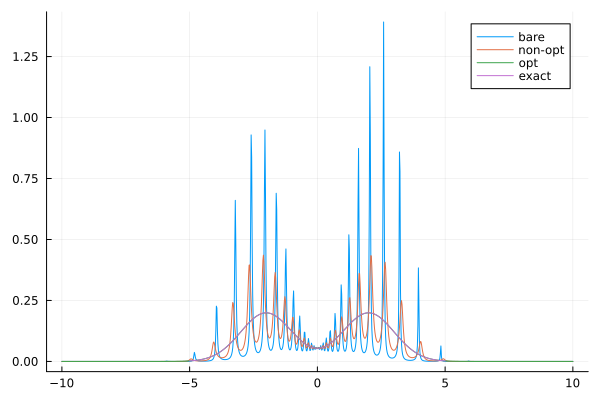

In [13]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi,label="bare")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi,label="non-opt")
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi,label="opt")
plot!(omegas, rho.(omegas),label="exact")